# Alan Thanickal, 2103793

# Part A. Baseline case

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# --- Defining for First plot --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [3]:
# --- Problem setup for First --- #

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [4]:
# --- Call the ODE solver and extract solutions (for First) --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

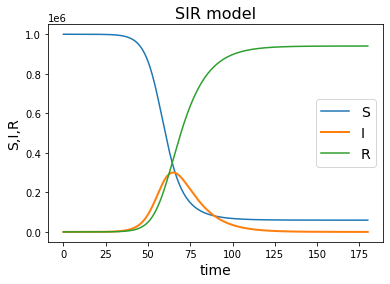

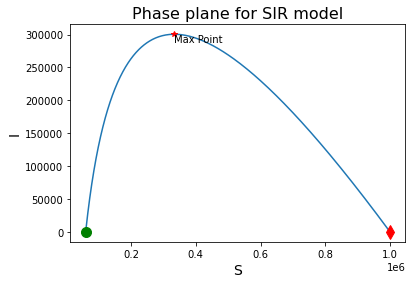

Finding the max value:
Max Value of I:  300463.6740973029
Max Value of S:  332721.02710906375


In [5]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.plot(332721.02710906375, 300463.6740973029, 'r*')
plt.text(332721.02710906375, 300463.6740973029,'Max Point', verticalalignment= 'top')
plt.show()

print("Finding the max value:")
max_I = max(I)  # Find the maximum y value
max_S = S[I.argmax()]  # Find the x value corresponding to the maximum y value
print("Max Value of I: " ,max_I)
print("Max Value of S: " ,max_S)

# Part B. Prior immunity

In [6]:
# --- Defining for Second plot --- #

def ABC(y2, t2):
    # returns RHS of the SIR model
    A, B, C = y2

    beta1 = 0.3
    gamma1 = 0.1
    
    D = A + B + C
    Adot = -beta1 * A * B / D
    Bdot = beta1 * A * B / D - gamma1 * B
    Cdot = gamma1 * B
    
    return Adot, Bdot, Cdot

In [7]:
# --- Problem setup for Second --- #

# set up time grid for solution
t2f = 180
N2steps = 1800
t2= np.linspace(0, t2f, N2steps+1)

# Set initial conditions and put into array y0
A0 = 799995
B0 = 5
C0 = 200000
y20 = np.array([A0, B0, C0])

In [8]:
# --- Call the ODE solver and extract solutions (for Second) --- #
  
y2_sol = odeint(ABC, y20, t2)

# extract S, I, R from the solution array y2
A = y2_sol[:,0]
B = y2_sol[:,1]
C = y2_sol[:,2]

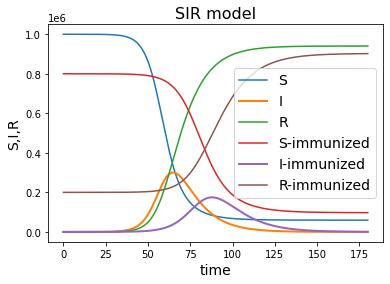

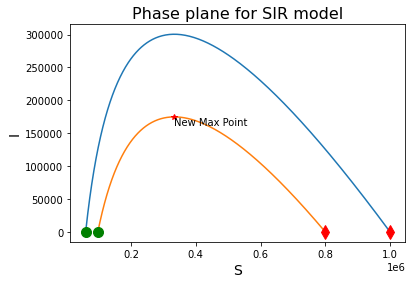

Finding the new max value:
Max Value of I:  174845.5900502789
Max Value of S:  332927.1299088261


In [9]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")
# plot the time evolution of the A, B, C
plt.plot(t2, A, label="S-immunized")
plt.plot(t2, B, lw = 2, label="I-immunized")
plt.plot(t2, C, label="R-immunized")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)
plt.plot(A, B)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.plot(A[0], B[0], 'rd', markersize = 10)
plt.plot(A[-1], B[-1], 'go', markersize = 10)
plt.plot(332927.1299088261, 174845.5900502789, 'r*')
plt.text(332927.1299088261, 174845.5900502789,'New Max Point', verticalalignment= 'top')
plt.show()

print("Finding the new max value:")
max_I = max(I)  # Find the maximum y value
max_S = S[I.argmax()]  # Find the x value corresponding to the maximum y value
max_B = max(B)
max_A = A[B.argmax()] 
print("Max Value of I: " ,max_B)
print("Max Value of S: " ,max_A)

# Part C. Social distancing

In [10]:
# --- Defining for First plot --- #

def EFG(y3, t3):
    # returns RHS of the SIR model
    E, F, G = y3

    if t3 <= 43:
        beta2 = 0.3
    elif 43 < t3 < 73:
        beta2 = 0.24
    else:
        beta2 = 0.3
    gamma2 = 0.1
    
    H = E + F + G
    Edot = -beta2 * E * F / H
    Fdot = beta2 * E * F / H - gamma2 * F
    Gdot = gamma2 * F
    
    return Edot, Fdot, Gdot

In [11]:
# --- Problem setup for First --- #

# set up time grid for solution
t3f = 180
N3steps = 1800
t3= np.linspace(0, t3f, N3steps+1)

# Set initial conditions and put into array y0
E0 = 10.0**6 - 5
F0 = 5
G0 = 0
y30 = np.array([E0, F0, G0])

In [12]:
# --- Call the ODE solver and extract solutions (for First) --- #
  
y3_sol = odeint(EFG, y30, t3)

# extract S, I, R from the solution array y
E = y3_sol[:,0]
F = y3_sol[:,1]
G = y3_sol[:,2]

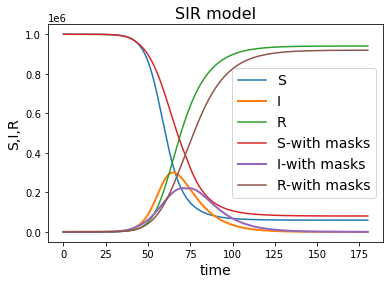

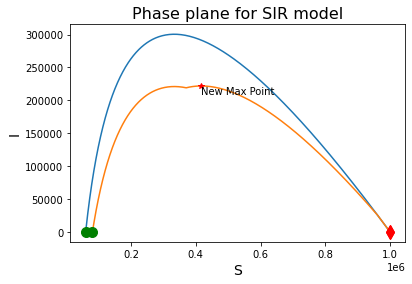

Finding the new max value:
Max Value of I:  221850.67776266113
Max Value of S:  416101.5612250196


In [13]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")
# plot the time evolution of the S, I, R
plt.plot(t3, E, label="S-with masks")
plt.plot(t3, F, lw = 2, label="I-with masks")
plt.plot(t3, G, label="R-with masks")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)
plt.plot(E, F)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.plot(E[0], F[0], 'rd', markersize = 10)
plt.plot(E[-1], F[-1], 'go', markersize = 10)
plt.plot(416101.5612250196, 221850.67776266113, 'r*')
plt.text(416101.5612250196, 221850.67776266113,'New Max Point', verticalalignment= 'top')
plt.show()

print("Finding the new max value:")
max_F = max(F)  # Find the maximum y value
max_E = E[F.argmax()]  # Find the x value corresponding to the maximum y value
print("Max Value of I: " ,max_F)
print("Max Value of S: " ,max_E)